In [11]:
import numpy as np
import joblib
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Load the saved GRU model
model = load_model('../models/gru_model.keras')

### Making a single prediction

In [5]:
# Load preprocessed data and the trained scaler
scaled_data = np.load('../data/processed/scaled_data.npy')
X_train = np.load("../data/processed/X_train.npy")
scaler = joblib.load("../data/processed/scaler.pkl")

# load the last window of the scaled data (ie. the data used for prediction)
last_window = scaled_data[-X_train.shape[1]:]  # Using the last sequence of scaled data
last_window = np.reshape(last_window, (1, X_train.shape[1], 1))

# Make prediction
predicted_price_scaled = model.predict(last_window)

# Rescale back to original values
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(f"Predicted Stock Price: {predicted_price[0][0]}")

1/1 [==============================] - 0s 391ms/step
Predicted Stock Price: 129.41204833984375


In [26]:
# Save the last window
np.save('../data/processed/last_window.npy', last_window)

### Predicting the (Next N Days)

In [23]:
def predict_next_n_days(model, scaler, last_window, n_days):
    predictions = []
    current_input = last_window
    
    for _ in range(n_days):
        prediction_scaled = model.predict(current_input)
        prediction = scaler.inverse_transform(prediction_scaled)
        predictions.append(prediction[0][0])
        
        # Reshape prediction_scaled to have the same shape as current_input[:, -1:, :]
        prediction_scaled = np.reshape(prediction_scaled, (1, 1, 1))
        
        # Append the predicted value to the current input and shift
        new_input = np.append(current_input[:, 1:, :], prediction_scaled, axis=1)
        current_input = new_input
    
    return predictions

# Predict stock prices for the next 3 days
n_days = 3
predictions = predict_next_n_days(model, scaler, last_window, n_days)
print(f"Predicted stock prices for the next {n_days} days: {predictions}")

1/1 [==============================] - 0s 28ms/step
Predicted stock prices for the next 3 days: [129.41205, 129.50677, 129.17564]


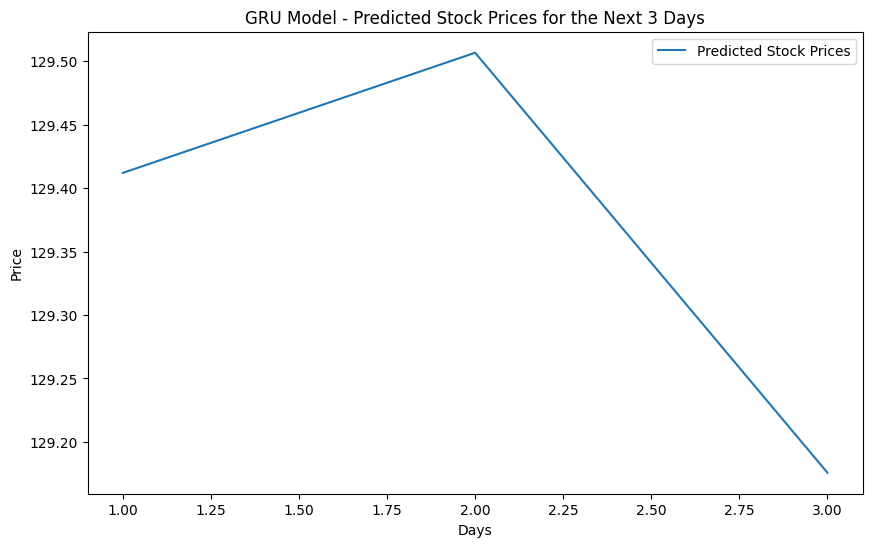

In [24]:
# Plot the predicted stock prices for the next N days
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_days + 1), predictions, label="Predicted Stock Prices")
plt.title(f"GRU Model - Predicted Stock Prices for the Next {n_days} Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()